<a href="https://colab.research.google.com/github/prem1424/major-project-cardio/blob/main/cardio_final_major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded. Shape: (70000, 13)
     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  age_years  
0     0       1       0         50  
1     0       1       1         55  
2     0       0       1         51  
3     0       1       1         48  
4     0       0       0         47  


/tmp/ipython-input-961387395.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cardio', data=data, palette="coolwarm")


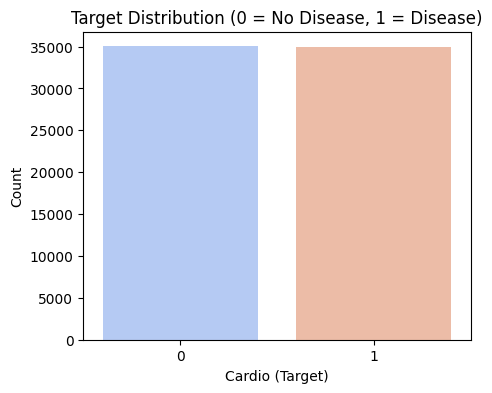

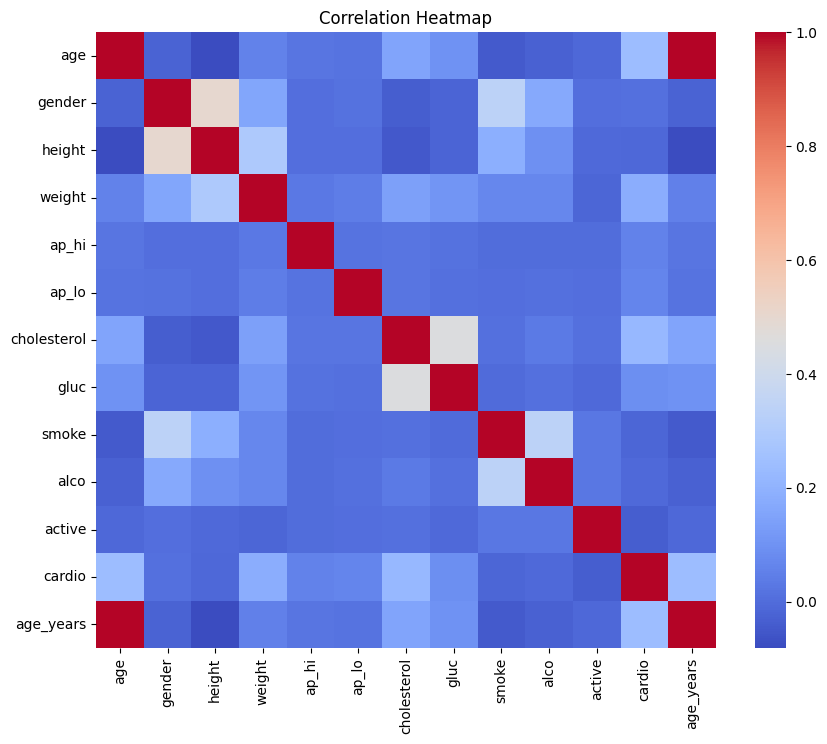


Logistic Regression Accuracy: 0.7138
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.67      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000


Random Forest Accuracy: 0.7134
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7004
           1       0.72      0.70      0.71      6996

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [ ]:
# -----------------------------
# HEART DISEASE PREDICTION PROJECT (with Graphs + User Input)
# -----------------------------

# 0. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# 1. Load Dataset
# -----------------------------
data = pd.read_csv("cardio data.csv", sep=";")

# Feature engineering
data["age_years"] = (data["age"] / 365).astype(int)

if "id" in data.columns:
    data.drop(columns=["id"], inplace=True)

print("✅ Dataset Loaded. Shape:", data.shape)
print(data.head())

# -----------------------------
# 2. EDA (Graphs)
# -----------------------------

# (1) Target Distribution
plt.figure(figsize=(5,4))
sns.countplot(x='cardio', data=data, palette="coolwarm")
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.xlabel("Cardio (Target)")
plt.ylabel("Count")
plt.show()

# (2) Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 3. Split Data
# -----------------------------
X = data.drop(columns=["cardio"])
y = data["cardio"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 4. Preprocessing
# -----------------------------
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(exclude=[np.number]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# -----------------------------
# 5. Train Multiple Models
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# -----------------------------
# 6. Accuracy Comparison Graph
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# -----------------------------
# 7. Best Model Confusion Matrix
# -----------------------------
best_model_name = max(results, key=results.get)
print("\n✅ Best Model:", best_model_name)

best_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", models[best_model_name])
])
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 8. User Input Section
# -----------------------------
print("\n🧍 Enter Patient Details to Predict:")

age_years = int(input("Age (in years): "))
gender = int(input("Gender (1 = Male, 2 = Female): "))
height = float(input("Height (in cm): "))
weight = float(input("Weight (in kg): "))
ap_hi = int(input("Systolic BP (ap_hi): "))
ap_lo = int(input("Diastolic BP (ap_lo): "))
cholesterol = int(input("Cholesterol (1 = Normal, 2 = Above Normal, 3 = Well Above Normal): "))
gluc = int(input("Glucose (1 = Normal, 2 = Above Normal, 3 = Well Above Normal): "))
smoke = int(input("Smoke (0 = No, 1 = Yes): "))
alco = int(input("Alcohol Intake (0 = No, 1 = Yes): "))
active = int(input("Physical Activity (0 = No, 1 = Yes): "))

# Create sample DataFrame
sample = {
    "age": age_years * 365,
    "gender": gender,
    "height": height,
    "weight": weight,
    "ap_hi": ap_hi,
    "ap_lo": ap_lo,
    "cholesterol": cholesterol,
    "gluc": gluc,
    "smoke": smoke,
    "alco": alco,
    "active": active,
    "age_years": age_years
}
sample_df = pd.DataFrame([sample])

# -----------------------------
# 9. Make Prediction
# -----------------------------
prediction = best_model.predict(sample_df)[0]
print("\n🩺 Prediction Result:", "🚨 Disease Detected" if prediction == 1 else "✅ No Disease Detected")